# Recreate Figure 3

In [6]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

plt.rcParams["font.family"] = "Times New Roman"

PLOT_FONT_SIZE = 12
MAX_ITER = 350

%matplotlib inline

__Change the filename below to point to your progress.csv file__.  
  Or keep the same to use the same data as the figure in the paper.

In [2]:
filename = "ray_results/PPO_power-gridworld_b4178_00000_0_framework=torch_2021-11-02_20-28-17/progress.csv"

Read the progress.csv file as a dataframe.

In [4]:
df = pd.read_csv(filename)
df.index = df["training_iteration"]
df.head()

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,agent_timesteps_total,done,episodes_total,...,info/learner/building/learner_stats/entropy_coeff,info/learner/ev-charging/learner_stats/cur_kl_coeff,info/learner/ev-charging/learner_stats/cur_lr,info/learner/ev-charging/learner_stats/total_loss,info/learner/ev-charging/learner_stats/policy_loss,info/learner/ev-charging/learner_stats/vf_loss,info/learner/ev-charging/learner_stats/vf_explained_var,info/learner/ev-charging/learner_stats/kl,info/learner/ev-charging/learner_stats/entropy,info/learner/ev-charging/learner_stats/entropy_coeff
training_iteration,,,,,,,,,,,,,,,,,,,,,
1,-4731.648245,-10250.609945,-7273.470007,249.0,68,34,16932,50796,False,68,...,0.0,0.2000,0.0001,7020.094699,0.002140,7020.091906,0.050765,0.003337,1.418636,0.0
2,-4731.648245,-10250.609945,-7132.069355,249.0,68,34,33864,101592,False,136,...,0.0,0.1000,0.0001,6256.907704,-0.002448,6256.907596,0.071634,0.025680,1.465029,0.0
3,-4284.205659,-9503.138868,-6570.376232,249.0,68,34,50796,152388,False,204,...,0.0,0.1500,0.0001,4988.075612,0.003630,4988.071658,0.208215,0.002315,1.472418,0.0
4,-4214.947619,-8452.736490,-5797.558413,249.0,68,34,67728,203184,False,272,...,0.0,0.0750,0.0001,3749.534973,0.002712,3749.531963,0.306959,0.004048,1.460859,0.0
5,-2908.229870,-7020.776088,-5046.664831,249.0,68,34,84660,253980,False,340,...,0.0,0.0375,0.0001,2717.979372,0.003559,2717.975667,0.405207,0.003941,1.454563,0.0


Generate and save the figure.

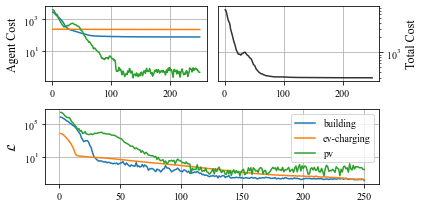

In [13]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(6, 3)

agents = ["building", "ev-charging", "pv"]

for agent in agents:
    axes[0, 0].plot(-1 * df[f'policy_reward_mean/{agent}'], label=agent)
axes[0, 0].grid()
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylabel('Agent Cost', fontsize=PLOT_FONT_SIZE)

axes[0, 1].plot(-1 * df['episode_reward_mean'], color='k', alpha=0.8)
axes[0, 1].grid()
axes[0, 1].set_yscale('log')
axes[0, 1].set_ylabel('Total Cost', fontsize=PLOT_FONT_SIZE)
axes[0, 1].yaxis.set_label_position("right")
axes[0, 1].yaxis.tick_right()

gs = GridSpec(2, 2, figure=fig)

for ax in axes[1, :]:
    ax.remove()

ax = fig.add_subplot(gs[1, :])
for agent in agents:    
    ax.plot(df[f'info/learner/{agent}/learner_stats/total_loss'])
    ax.grid()
    ax.set_yscale('log')
    ax.set_ylabel(r'$\mathcal{L}$', fontsize=PLOT_FONT_SIZE)
    
ax.legend(agents)

plt.tight_layout()

plt.savefig('heterogeneous-ppo.png', dpi=400)
plt.show()